In [85]:
import pandas as pd
import networkx as nx


import matplotlib.pyplot as plt

from tabulate import tabulate
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler


from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
import csv
import json


In [86]:
!pip install xlsxwriter
!pip install geopandas
!pip install contextily


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [87]:
df = pd.read_csv('../dataset/Psittaciformes.csv',
                 on_bad_lines='skip',
                 encoding='utf-8',
                 dtype=str,  # Read all as string first
                 skip_blank_lines=True,
                 header=0,
                 skipinitialspace=True)

In [88]:
print(df.columns)

Index(['scientificName', 'kingdomName', 'phylumName', 'className', 'orderName',
       'familyName', 'genusName', 'speciesName', 'redlistCategory',
       'redlistCriteria', 'yearPublished', 'assessmentDate', 'criteriaVersion',
       'language', 'populationTrend', 'systems', 'realm', 'yearLastSeen',
       'possiblyExtinct', 'possiblyExtinctInTheWild', 'scopes', 'Sequence',
       'Avibase.ID1', 'Total.individuals', 'Female', 'Male', 'Unknown',
       'Complete.measures', 'Beak.Length_Culmen', 'Beak.Length_Nares',
       'Beak.Width', 'Beak.Depth', 'Tarsus.Length', 'Wing.Length',
       'Kipps.Distance', 'Secondary1', 'Hand-Wing.Index', 'Tail.Length',
       'Mass', 'Mass.Source', 'Mass.Refs.Other', 'Inference',
       'Traits.inferred', 'Reference.species', 'Habitat', 'Habitat.Density',
       'Migration', 'Trophic.Level', 'Trophic.Niche', 'Primary.Lifestyle',
       'Min.Latitude', 'Max.Latitude', 'Centroid.Latitude',
       'Centroid.Longitude', 'Range.Size', 'internalTaxonId_x', '

In [89]:
basic_columns_list = [
    'scientificName',
    'familyName',
    'orderName',

    'Beak.Length_Culmen',
    'Beak.Length_Nares',
    'Beak.Width',
    'Beak.Depth',
    'Tarsus.Length',
    'Wing.Length',
    'Kipps.Distance',
    'Hand-Wing.Index',
    'Tail.Length',
    'Mass',

    'Habitat',
    'Habitat.Density',
    'Min.Latitude',
    'Max.Latitude',
    'Centroid.Latitude',
    'Centroid.Longitude',
    'Range.Size',


    'redlistCategory',
    'populationTrend',
    'threats'

]

In [90]:
df = df[basic_columns_list]

In [91]:
def analyze_habitats(data):
    """
    List and count unique habitat values
    """
    # Get unique habitats and their counts
    habitat_counts = data['Habitat'].value_counts()

    print("Unique Habitats and their counts:\n")
    print("Habitat Type".ljust(50), "Count")
    print("-" * 60)

    for habitat, count in habitat_counts.items():
        print(f"{str(habitat).ljust(50)} {count}")

    print("\nTotal number of unique habitats:", len(habitat_counts))
    print("Total number of records:", len(data))
    print("Number of null/missing values:", data['Habitat'].isna().sum())


In [92]:
analyze_habitats(df)

Unique Habitats and their counts:

Habitat Type                                       Count
------------------------------------------------------------
Forest                                             318
Woodland                                           49
Shrubland                                          22
Grassland                                          7
Human Modified                                     2
Desert                                             1

Total number of unique habitats: 6
Total number of records: 401
Number of null/missing values: 2


In [93]:
def plot_samples_per_latitude(data, n_lat_bins=10):
    """
    Create a histogram showing number of Birds per latitude band
    """
    # Convert latitude to numeric
    lat = pd.to_numeric(data['Centroid.Latitude'], errors='coerce')

    # Remove NaN values
    lat = lat[~np.isnan(lat)]

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))

    # Create histogram
    counts, bins, _ = ax.hist(lat, bins=n_lat_bins, color='skyblue',
                             edgecolor='black', alpha=0.7)

    # Add count labels on top of each bar
    for i in range(len(counts)):
        ax.text(bins[i] + (bins[i+1]-bins[i])/2, counts[i],
                f'{int(counts[i])}',
                horizontalalignment='center',
                verticalalignment='bottom')

    # Customize plot
    ax.set_title('Number of Birds per Latitude Band', pad=20)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Number of Birds')

    # Add grid
    ax.grid(True, alpha=0.2)

    # Add total sample size
    ax.text(0.98, 0.98, f'Total Birds = {len(lat)}',
            transform=ax.transAxes,
            horizontalalignment='right',
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    return fig

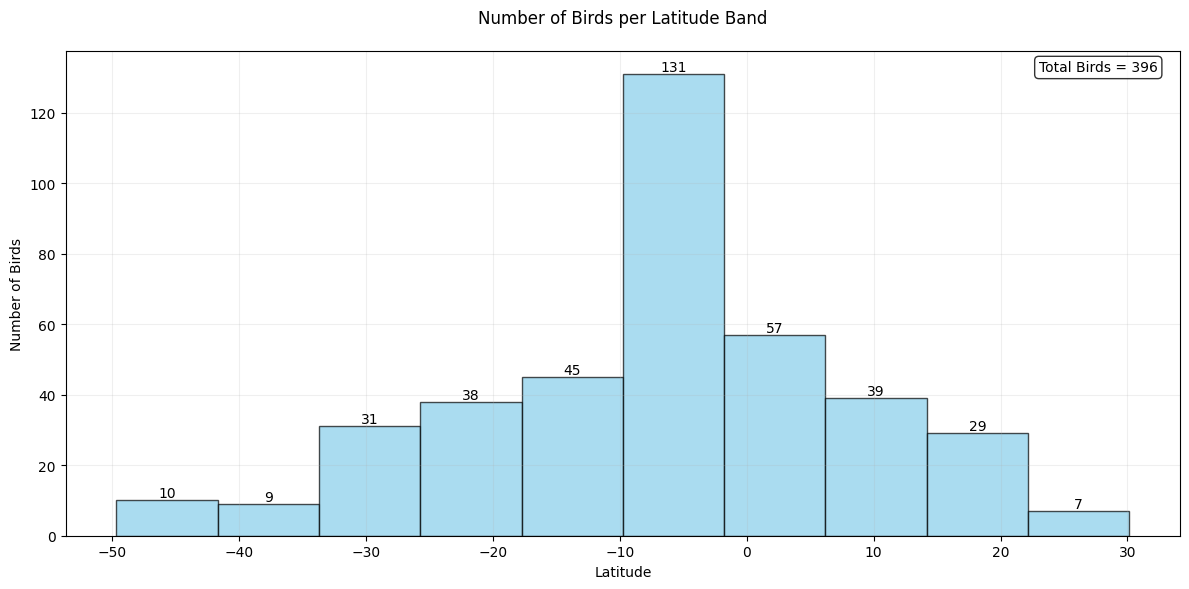

In [94]:
# Create the plot
fig = plot_samples_per_latitude(df)
plt.show()

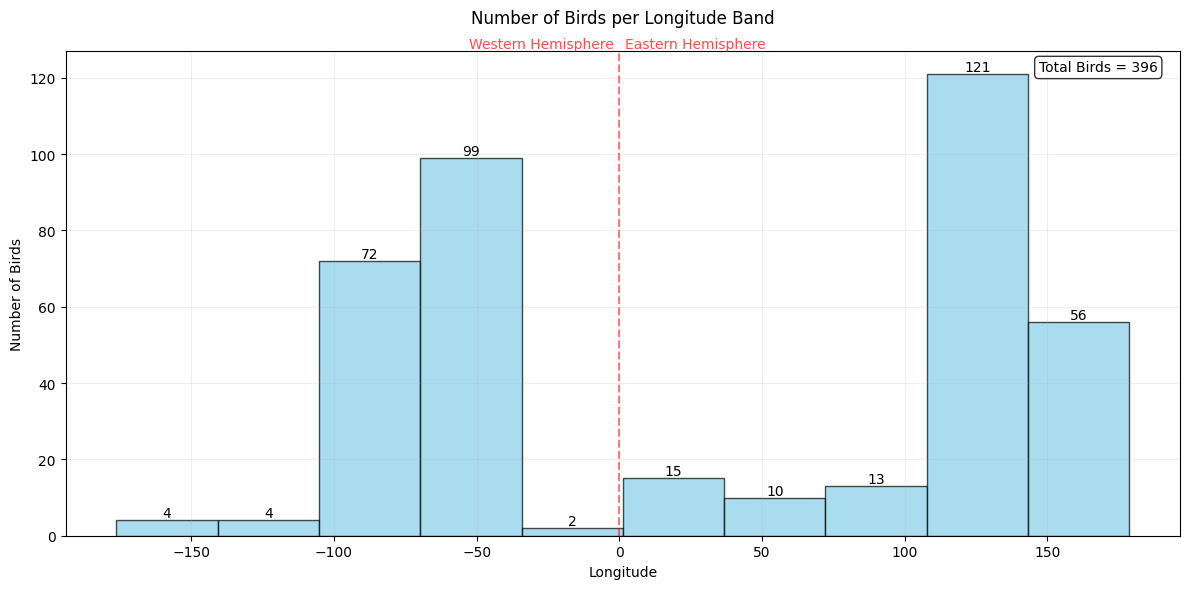

In [95]:
def plot_samples_per_longitude(data, n_lon_bins=10):
    """
    Create a histogram showing number of Birds per longitude band
    """
    # Convert longitude to numeric
    lon = pd.to_numeric(data['Centroid.Longitude'], errors='coerce')

    # Remove NaN values
    lon = lon[~np.isnan(lon)]

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))

    # Create histogram
    counts, bins, _ = ax.hist(lon, bins=n_lon_bins, color='skyblue',
                             edgecolor='black', alpha=0.7)

    # Add count labels on top of each bar
    for i in range(len(counts)):
        ax.text(bins[i] + (bins[i+1]-bins[i])/2, counts[i],
                f'{int(counts[i])}',
                horizontalalignment='center',
                verticalalignment='bottom')

    # Customize plot
    ax.set_title('Number of Birds per Longitude Band', pad=20)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Number of Birds')

    # Add grid
    ax.grid(True, alpha=0.2)

    # Add total sample size
    ax.text(0.98, 0.98, f'Total Birds = {len(lon)}',
            transform=ax.transAxes,
            horizontalalignment='right',
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Add hemisphere lines and labels
    ax.axvline(x=0, color='red', linestyle='--', alpha=0.5)
    ax.text(2, ax.get_ylim()[1], 'Eastern Hemisphere',
            color='red', alpha=0.7, ha='left', va='bottom')
    ax.text(-2, ax.get_ylim()[1], 'Western Hemisphere',
            color='red', alpha=0.7, ha='right', va='bottom')

    plt.tight_layout()
    return fig


fig = plot_samples_per_longitude(df)
plt.show()

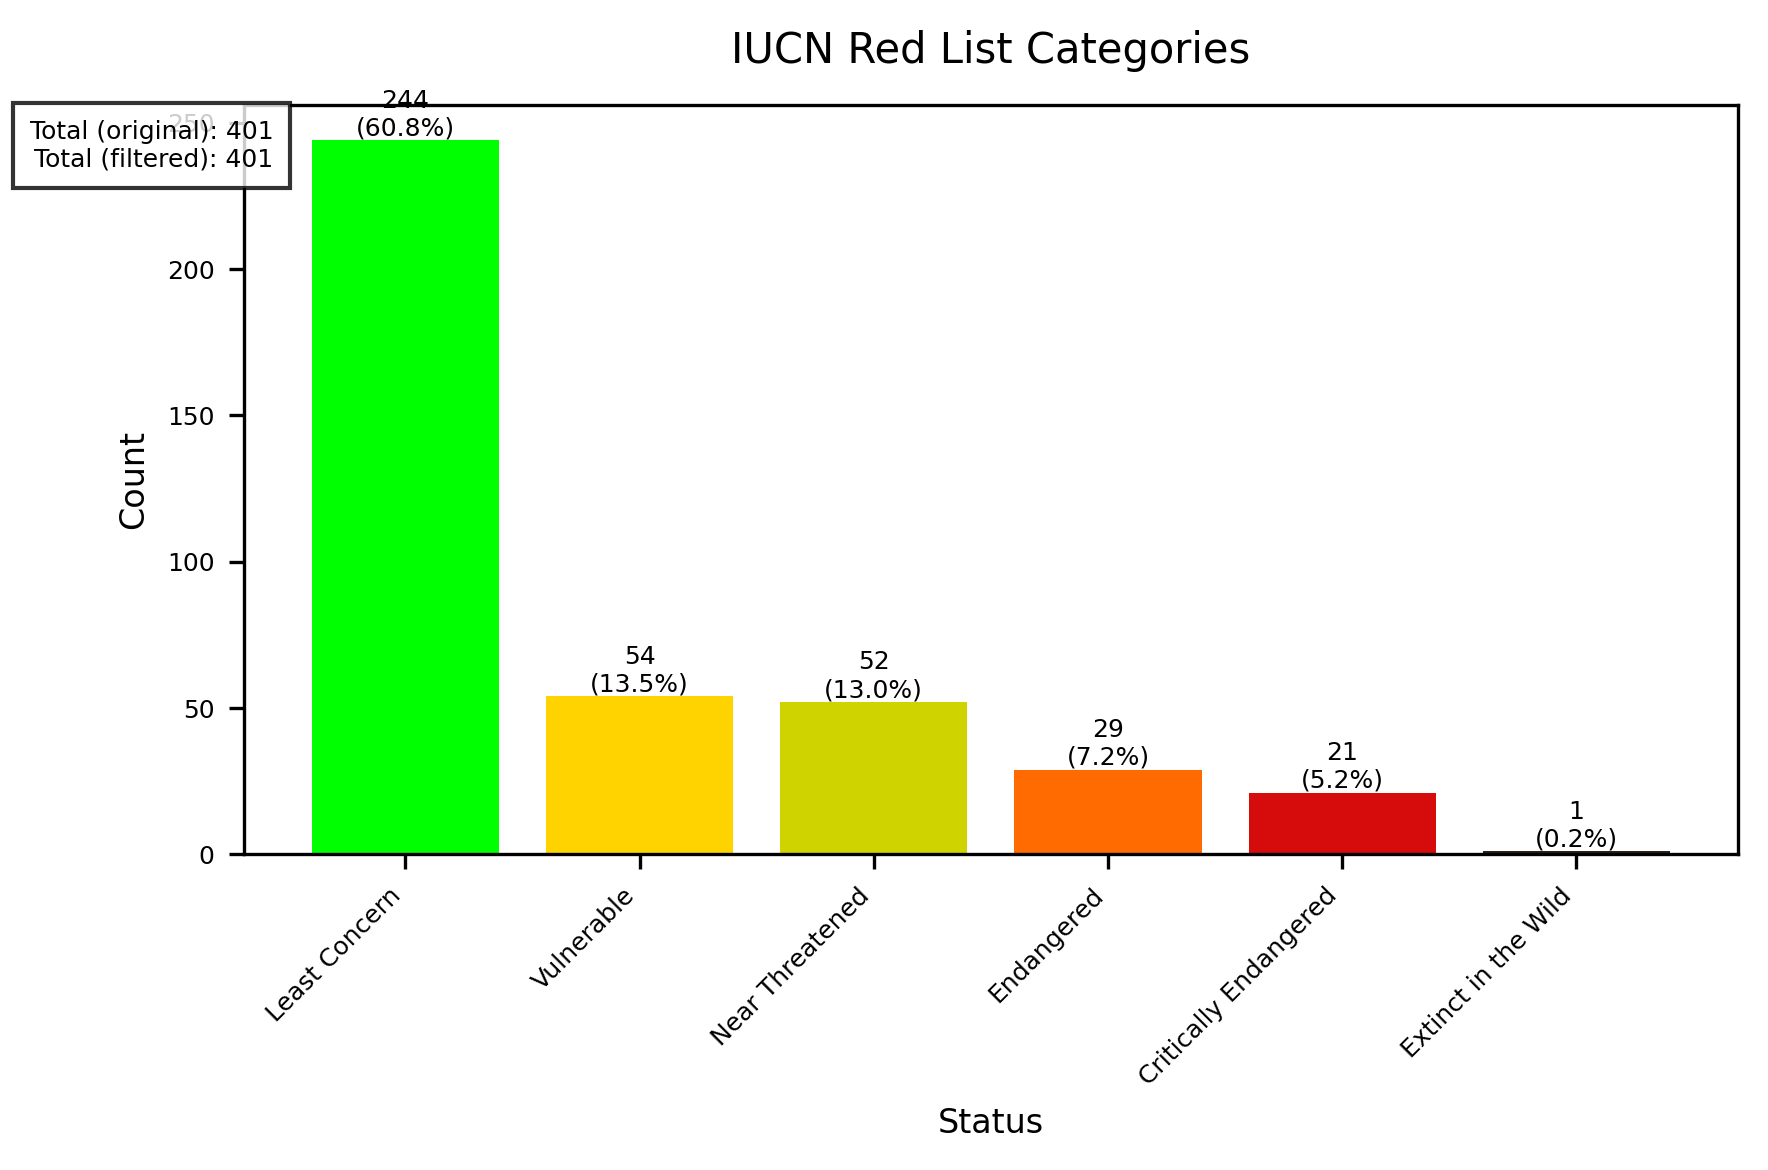

In [96]:
def plot_redlist_distribution(df, figsize=(6, 4), dpi=300):
    """
    Creates a histogram/distribution plot of Red List categories with smaller dimensions
    """
    # Define valid categories and filter
    valid_categories = [
        'Least Concern',
        'Vulnerable',
        'Endangered',
        'Critically Endangered',
        'Extinct in the Wild',
        'Near Threatened',
        'Extinct'
    ]

    df_filtered = df[df['redlistCategory'].isin(valid_categories)]




    # Define IUCN Red List colors
    colors = {
        'Least Concern': '#00FF00',        # Green
        'Vulnerable': '#FFD300',# Yellow
        'Near Threatened': '#CFD300',
        'Endangered': '#FF6B00',           # Orange
        'Critically Endangered': '#D60B0B', # Red
        'Extinct in the Wild': '#2D1F15',  # Dark Brown
        'Extinct': '#000000',              # Black
    }

    # Calculate value counts and percentages
    counts = df_filtered['redlistCategory'].value_counts()
    total_filtered = len(df_filtered)
    total_original = len(df)

    # Create figure with smaller size
    plt.figure(figsize=figsize, dpi=dpi)

    # Create bar plot
    bars = plt.bar(range(len(counts)), counts,
                  color=[colors.get(x, '#808080') for x in counts.index])

    # Customize plot with smaller font sizes
    plt.title('IUCN Red List Categories', pad=10, fontsize=10)
    plt.xlabel('Status', fontsize=8)
    plt.ylabel('Count', fontsize=8)

    # Rotate x-axis labels with smaller font
    plt.xticks(range(len(counts)), counts.index, rotation=45, ha='right', fontsize=6)
    plt.yticks(fontsize=6)

    # Add count labels with smaller font
    for bar in bars:
        height = bar.get_height()
        percentage = (height/total_filtered) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({percentage:.1f}%)',
                ha='center', va='bottom', fontsize=6)

    # Add both totals to upper right
    plt.text(0.02, 0.98,
             f'Total (original): {total_original:,}\nTotal (filtered): {total_filtered:,}',
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top',
             horizontalalignment='right',
             fontsize=6)

    plt.tight_layout()

    return plt.gcf()

# Usage:
fig = plot_redlist_distribution(df)
plt.show()


In [97]:
traits = [
    'Beak.Length_Culmen',
    'Beak.Length_Nares',
    'Beak.Width',
    'Beak.Depth',
    'Tarsus.Length',
    'Wing.Length',
    'Kipps.Distance',
    'Hand-Wing.Index',
    'Tail.Length',
    'Mass'
]

In [98]:
unique_values = df['familyName'].unique()
print(unique_values)

['PSITTACIDAE' 'CACATUIDAE' 'STRIGOPIDAE']


In [99]:
def standardize_traits(df_traits, traits):
    """Standardize/Normalize morphological traits."""
    scaler = StandardScaler()
    standardized_traits = scaler.fit_transform(df_traits[traits])
    species_names = df_traits['scientificName'].values
    return standardized_traits, species_names

def compute_similarity(standardized_traits):
    """
    Compute cosine similarity between species and ensure values are in [-1,1] range.

    Parameters:
        standardized_traits: numpy array of standardized morphological traits
    Returns:
        similarity_matrix: numpy array of pairwise similarities
    """
    # Compute cosine similarity
    similarity_matrix = cosine_similarity(standardized_traits)

    # Clip values to ensure they're in [-1,1] range
    similarity_matrix = np.clip(similarity_matrix, -1, 1)

    # Additional checks
    print("Similarity matrix range:",
          f"min: {similarity_matrix.min():.3f}, max: {similarity_matrix.max():.3f}")

    # Verify similarity range
    if not np.all((similarity_matrix >= -1) & (similarity_matrix <= 1)):
        print("Warning: Original similarity values were outside [-1,1] range")

    return similarity_matrix

In [100]:
def create_knn_network(similarity_matrix, species_names, df_data, k=5):
    """
    Create network with node attributes and k-nearest neighbor connections.
    Prevents self-loops and ensures proper KNN connections.

    Parameters:
        similarity_matrix: Matrix of pairwise species similarities
        species_names: List of species names
        df_data: DataFrame containing species attributes (lat, long, family, etc.)
        k: Number of nearest neighbors to connect for each node
    """
    G_knn = nx.Graph()
    
    # Define categories and their keywords
    categories = {
        'Trade': ["trade"],
        'Habitat Loss': ["habitat", "loss", "forest", "areas"],
        'Climate Change': ["cyclones", "natural", "climate"],
        'Diseases': ["avian", "malaria"],
        'Predation': ["predators"],
        'Human Activity': ["hunting", "logging", "agriculture"],
        'Pollution': ["pollution"],
    }
    
    def categorize_threat(threat, category_keywords):
        if not isinstance(threat, str):  # Check if the threat is not a string
            return []  # Return an empty list if no threats
        return [cat for cat, keywords in category_keywords.items() if any(keyword in threat.lower() for keyword in keywords)]

    # Add nodes with attributes
    for species in species_names:
        # Get species data from DataFrame
        species_data = df_data[df_data['scientificName'] == species].iloc[0]

        # Categorize threats
        threats = species_data.get('threats', '')
        threat_categories = categorize_threat(threats, categories)
        threat_categories = [t for t in threat_categories if t]
        threat_categories_json = json.dumps(threat_categories)
        
        # Add node with attributes
        G_knn.add_node(
            species,
            latitude=species_data['Centroid.Latitude'],
            longitude=species_data['Centroid.Longitude'],
            family=species_data['familyName'],
            scientific_name=species,
            threats=threat_categories_json
        )

    # Create a mask for the diagonal to exclude self-connections
    np.fill_diagonal(similarity_matrix, -np.inf)  # Set diagonal to negative infinity

    # Add edges based on k-nearest neighbors
    for i in range(len(species_names)):
        # Get indices of k most similar species (excluding self)
        similarities = similarity_matrix[i]
        # Argsort in descending order (most similar first)
        most_similar_indices = np.argsort(similarities)[::-1][:k]

        # Add edges to k nearest neighbors
        for j in most_similar_indices:
            G_knn.add_edge(
                species_names[i],
                species_names[j],
                weight=similarity_matrix[i][j]
            )

    #Check for self-loops
    self_loops = list(nx.selfloop_edges(G_knn))
    if self_loops:
        print("Warning: Self-loops found in the network:")
        for edge in self_loops:
            print(f"Self-loop found for node: {edge[0]}")
    else:
        print("No self-loops found in the network")

    # Additional network statistics
    print(f"\nNetwork Statistics:")
    print(f"Number of nodes: {G_knn.number_of_nodes()}")
    print(f"Number of edges: {G_knn.number_of_edges()}")
    print(f"Average degree: {sum(dict(G_knn.degree()).values()) / G_knn.number_of_nodes():.2f}")

    return G_knn

In [101]:
# 1. Data Preparation
# Create a copy of the data with species names and morphological traits
# Drop any rows with missing values (NaN)
df_traits = df[['scientificName'] + traits].copy()
df_traits = df_traits.dropna()

# 2. Data Standardization
# StandardScaler transforms features to have mean=0 and variance=1
# This ensures all traits contribute equally regardless of their original scales
standardized_traits, species_names = standardize_traits(df_traits, traits)

# 3. Similarity Calculation
# Compute cosine similarity between all pairs of species
# Result is a square matrix where each cell[i,j] is similarity between species i and j
similarity_matrix = compute_similarity(standardized_traits)

Similarity matrix range: min: -0.989, max: 1.000


In [102]:
# Visualize similarity distribution
def plot_similarity_distribution(similarity_matrix):
    """
    Plot the distribution of similarity values to help with thresholding
    """
    plt.figure(figsize=(10, 6))
    # Get upper triangle values
    upper_tri = similarity_matrix[np.triu_indices(len(similarity_matrix), k=1)]

    plt.hist(upper_tri, bins=50)
    plt.title('Distribution of Similarity Values')
    plt.xlabel('Similarity')
    plt.ylabel('count')


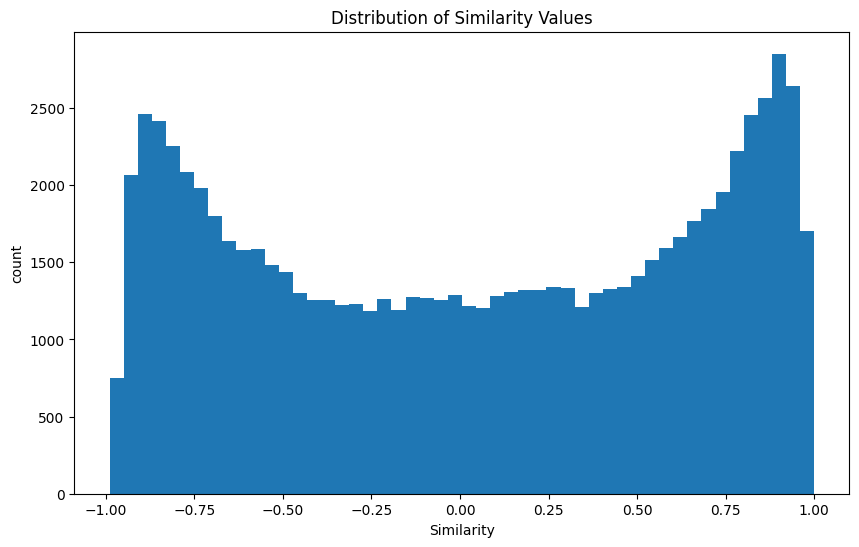

In [103]:
plot_similarity_distribution(similarity_matrix)

In [104]:
# Save similarity matrix
similarity_df = pd.DataFrame(similarity_matrix,
                           index=species_names,
                           columns=species_names)
similarity_df.to_excel('similarity_matrix.xlsx')

In [105]:
G_knn = create_knn_network(
        similarity_matrix=similarity_matrix,
        species_names=species_names,
        df_data=df,
        k=5
)

No self-loops found in the network

Network Statistics:
Number of nodes: 401
Number of edges: 1405
Average degree: 7.01


In [106]:
def save_graph_to_graphml(G, filename, compress=True):
    """
    Save network to GraphML format with proper attribute handling

    Parameters:
    G: NetworkX graph
    filename: Output filename (with or without extension)
    compress: Boolean, whether to compress the output file
    """
    try:
        # Ensure proper file extension
        if not filename.endswith('.graphml'):
            filename += '.graphml'

        if compress and not filename.endswith('.gz'):
            filename += '.gz'

        # Convert all attributes to strings to ensure compatibility
        G_save = G.copy()

        # Handle node attributes
        for node, attrs in G_save.nodes(data=True):
            for key, value in attrs.items():
                if isinstance(value, (list, dict, set)):
                    G_save.nodes[node][key] = str(value)
                elif pd.isna(value):
                    G_save.nodes[node][key] = ''

        # Handle edge attributes
        for u, v, attrs in G_save.edges(data=True):
            for key, value in attrs.items():
                if isinstance(value, (list, dict, set)):
                    G_save[u][v][key] = str(value)
                elif pd.isna(value):
                    G_save[u][v][key] = ''

        # Save the graph
        nx.write_graphml(G_save, filename)

        print(f"Graph successfully saved to {filename}")

        # Print some statistics
        print(f"\nSaved graph statistics:")
        print(f"Nodes: {G_save.number_of_nodes()}")
        print(f"Edges: {G_save.number_of_edges()}")
        print(f"Node attributes: {list(next(iter(G_save.nodes(data=True)))[1].keys())}")
        edge_attrs = list(next(iter(G_save.edges(data=True)))[2].keys()) if G_save.number_of_edges() > 0 else []
        print(f"Edge attributes: {edge_attrs}")

        return True

    except Exception as e:
        print(f"Error saving graph: {str(e)}")
        return False

In [107]:
save_graph_to_graphml(G_knn, 'morphological_parrot_network.graphml', compress=False)

Graph successfully saved to morphological_parrot_network.graphml

Saved graph statistics:
Nodes: 401
Edges: 1405
Node attributes: ['latitude', 'longitude', 'family', 'scientific_name', 'threats']
Edge attributes: ['weight']


True

In [108]:
def analyze_connectivity(G):
    # Check if graph is connected
    is_connected = nx.is_connected(G)

    # Get connected components
    components = list(nx.connected_components(G))
    n_components = len(components)

    # Get largest component
    largest_component = max(components, key=len)

    # Calculate size metrics
    total_nodes = G.number_of_nodes()
    largest_component_size = len(largest_component)
    largest_component_ratio = largest_component_size / total_nodes

    # Create subgraph of largest component
    G_largest = G.subgraph(largest_component)

    # Print analysis
    print(f"Graph Connectivity Analysis:")
    print(f"Is connected: {is_connected}")
    print(f"Number of components: {n_components}")
    print(f"Total nodes: {total_nodes}")
    print(f"Total edges: {G.number_of_edges()}")
    print(f"Largest component size: {largest_component_size}")
    print(f"Largest component ratio: {largest_component_ratio:.2%}")

    # Visualize components
    plt.figure(figsize=(15, 10))

    # Position all nodes using spring layout
    pos = nx.spring_layout(G)

    # Draw each component in a different color
    colors = plt.cm.rainbow(np.linspace(0, 1, n_components))
    for idx, component in enumerate(components):
        nx.draw_networkx_nodes(G, pos,
                             nodelist=list(component),
                             node_color=[colors[idx]],
                             node_size=100,
                             alpha=0.7)

    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.2)

    # Add labels for larger components
    component_sizes = [len(c) for c in components]
    for idx, (component, size) in enumerate(zip(components, component_sizes)):
        if size > total_nodes * 0.05:  # Label components with >5% of nodes
            center_x = np.mean([pos[node][0] for node in component])
            center_y = np.mean([pos[node][1] for node in component])
            plt.text(center_x, center_y, f'Component {idx+1}\n({size} nodes)',
                    horizontalalignment='center',
                    verticalalignment='center',
                    bbox=dict(facecolor='white', alpha=0.7))

    plt.title("Connected Components Visualization")
    plt.axis('off')
    plt.show()

    return {
        'is_connected': is_connected,
        'n_components': n_components,

        'largest_component_size': largest_component_size,
        'largest_component_ratio': largest_component_ratio,

    }

Graph Connectivity Analysis:
Is connected: True
Number of components: 1
Total nodes: 401
Total edges: 1405
Largest component size: 401
Largest component ratio: 100.00%


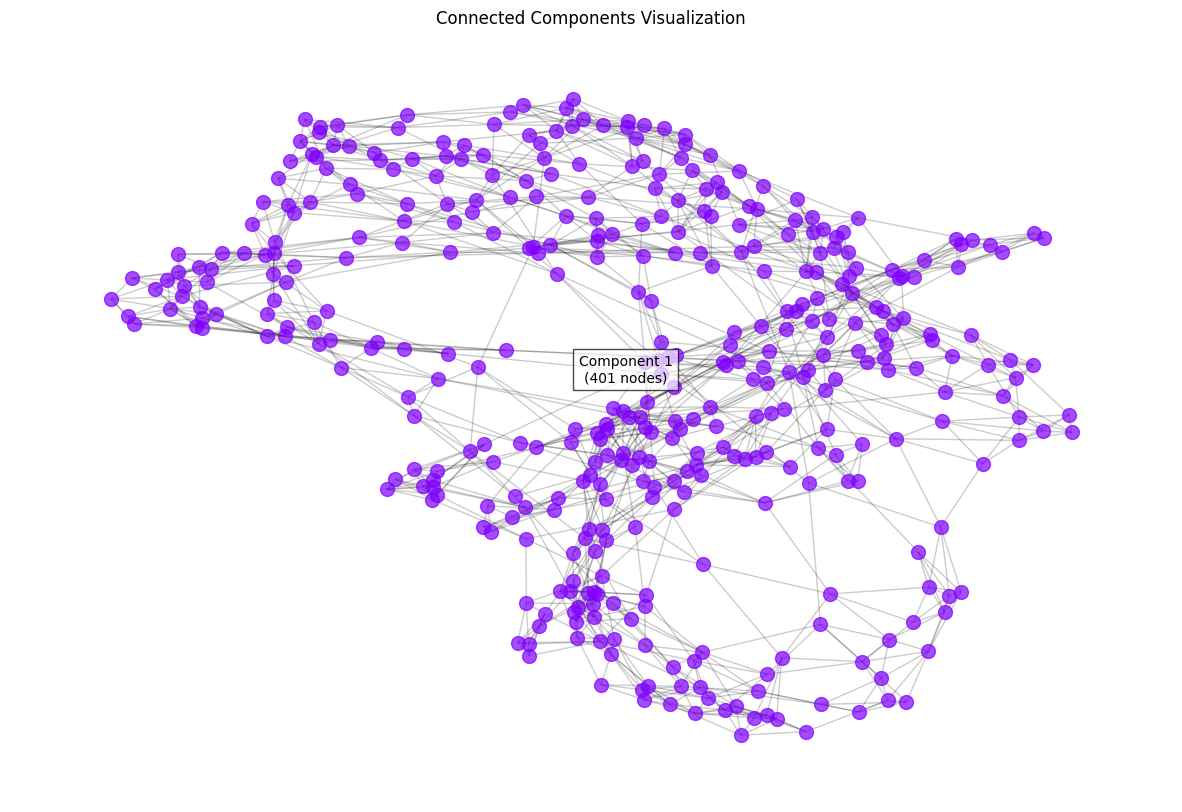

{'is_connected': True,
 'n_components': 1,
 'largest_component_size': 401,
 'largest_component_ratio': 1.0}

In [109]:
analyze_connectivity(G_knn)

In [110]:
def graphml_to_json_custom(graphml_path, json_path):
    """
    Convert GraphML to custom JSON format with separate node and edge lists
    """
    G = nx.read_graphml(graphml_path)

    # Create custom format
    graph_data = {
        'nodes': [],
        'edges': []
    }

    # Add nodes with attributes
    for node, attrs in G.nodes(data=True):
        node_data = {'id': node}
        node_data.update(attrs)
        graph_data['nodes'].append(node_data)

    # Add edges with attributes
    for source, target, attrs in G.edges(data=True):
        edge_data = {
            'source': source,
            'target': target
        }
        edge_data.update(attrs)
        graph_data['edges'].append(edge_data)

    # Save to file
    with open(json_path, 'w') as f:
        json.dump(graph_data, f, indent=2)

    print(f"Nodes: {len(graph_data['nodes'])}")
    print(f"Edges: {len(graph_data['edges'])}")
    return graph_data

In [111]:
graphml_to_json_custom('morphological_parrot_network.graphml', 'morphological_traits_with_threats.json')

Nodes: 401
Edges: 1405


{'nodes': [{'id': 'Eos histrio',
   'latitude': '4.21',
   'longitude': '126.78',
   'family': 'PSITTACIDAE',
   'scientific_name': 'Eos histrio',
   'threats': '["Trade", "Habitat Loss", "Human Activity"]'},
  {'id': 'Trichoglossus euteles',
   'latitude': '-8.98',
   'longitude': '125.22',
   'family': 'PSITTACIDAE',
   'scientific_name': 'Trichoglossus euteles',
   'threats': '[]'},
  {'id': 'Trichoglossus johnstoniae',
   'latitude': '7.32',
   'longitude': '124.74',
   'family': 'PSITTACIDAE',
   'scientific_name': 'Trichoglossus johnstoniae',
   'threats': '["Habitat Loss", "Climate Change", "Human Activity"]'},
  {'id': 'Vini australis',
   'latitude': '-14.66',
   'longitude': '-172.41',
   'family': 'PSITTACIDAE',
   'scientific_name': 'Vini australis',
   'threats': '[]'},
  {'id': 'Charmosyna palmarum',
   'latitude': '-15.49',
   'longitude': '167.39',
   'family': 'PSITTACIDAE',
   'scientific_name': 'Charmosyna palmarum',
   'threats': '["Habitat Loss", "Climate Change", 

In [112]:
def graphml_to_json_custom(graphml_path, json_path, threat_categories):
    """
    Convert GraphML to custom JSON format with separate node and edge lists
    and add all matching threats for each bird (node).
    """
    def categorize_threat(threat, category_keywords):
        """
        Return a list of all matching threat categories for the given threat description.
        """
        return [category for category, keywords in category_keywords.items()
                if any(keyword in threat.lower() for keyword in keywords)]

    # Read the GraphML file
    G = nx.read_graphml(graphml_path)

    # Create custom format
    graph_data = {
        'nodes': [],
        'edges': []
    }

    # Add nodes with attributes
    for node, attrs in G.nodes(data=True):
        node_data = {'id': node}
        node_data.update(attrs)
        # Add all threats if threat information exists
        if 'threats' in attrs:
            node_data['threat_categories'] = categorize_threat(attrs['threat'], threat_categories)
        graph_data['nodes'].append(node_data)

    # Add edges with attributes
    for source, target, attrs in G.edges(data=True):
        edge_data = {
            'source': source,
            'target': target
        }
        edge_data.update(attrs)
        graph_data['edges'].append(edge_data)

    # Save to file
    with open(json_path, 'w') as f:
        json.dump(graph_data, f, indent=2)

    print(f"Nodes: {len(graph_data['nodes'])}")
    print(f"Edges: {len(graph_data['edges'])}")
    return graph_data

# Example usage
categories = {
    'Trade': ['trade'],
    'Habitat Loss': ['habitat', 'loss', 'forest', 'areas'],
    'Climate Change': ['cyclones', 'natural', 'climate'],
    'Diseases': ['avian', 'malaria'],
    'Predation': ['predators'],
    'Human Activity': ['hunting', 'logging', 'agriculture'],
    'Pollution': ['pollution'],
}

# Replace with actual paths
graphml_path = 'morphological_parrot_network.graphml'
json_path = 'output_with_threats.json'

# Generate JSON with threats for each bird
graphml_to_json_custom(graphml_path, json_path, categories)


KeyError: 'threat'